## In this Notebook, We will work on Dataset of 5 types of flowers(Daisy, Dandelion, Rose, Sunflower and Tulip). We will predict that the given flower belongs to which category from these 5 Category.


### First import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os.path import isfile, join, abspath, exists, isdir, expanduser
from os import listdir, makedirs, getcwd, remove
from pathlib import Path
import shutil
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.preprocessing import image




Using TensorFlow backend.


#### Check the path of Directory

In [2]:
os.path.abspath("")

'C:\\Users\\hp\\Desktop\\ML\\My_Model\\flowers_recognition'

#### Assign the path

In [3]:
flowers_path = r"C:\Users\hp\Desktop\ML\My_Model\flowers_recognition\flowers"

#### Checks the Number of Category and types of Category

In [4]:
flower_types = os.listdir(flowers_path)
print("Types of flowers found: ", len(flower_types))
print("Categories of flowers: ", flower_types)

Types of flowers found:  5
Categories of flowers:  ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


####  Creating a dataframe for all images

In [5]:
# In order to keep track of data details, 
# Always try to get the information in a dataframe.

# A list that is going to contain tuples: (species of the flower, corresponding image path)
flowers = []

for species in flower_types:
    # Get all the file names
    all_flowers = os.listdir(flowers_path +'/'+ species)
    
    # Add them to the list
    for flower in all_flowers:
        flowers.append((species, str(flowers_path + '/' + species + '/' + flower)))

# Build a dataframe        
flowers = pd.DataFrame(data=flowers, columns=['category', 'image'], index=None)
flowers.head()

,category,image
0,daisy,C:\Users\hp\Desktop\ML\My_Model\flowers_recogn...
1,daisy,C:\Users\hp\Desktop\ML\My_Model\flowers_recogn...
2,daisy,C:\Users\hp\Desktop\ML\My_Model\flowers_recogn...
3,daisy,C:\Users\hp\Desktop\ML\My_Model\flowers_recogn...
4,daisy,C:\Users\hp\Desktop\ML\My_Model\flowers_recogn...


#### Check samples in Each Category

In [6]:
# Let's check how many samples for each category are present
print("Tatal numbers of flowers in dataset: ",len(flowers))
flowers_count = flowers['category'].value_counts()
print("Flowers in each category: ")
print(flowers_count)

Tatal numbers of flowers in dataset:  4326
Flowers in each category: 
dandelion    1055
tulip         984
rose          784
daisy         769
sunflower     734
Name: category, dtype: int64


### Plot Graph between Category and Numbers of Flowers in each Category 

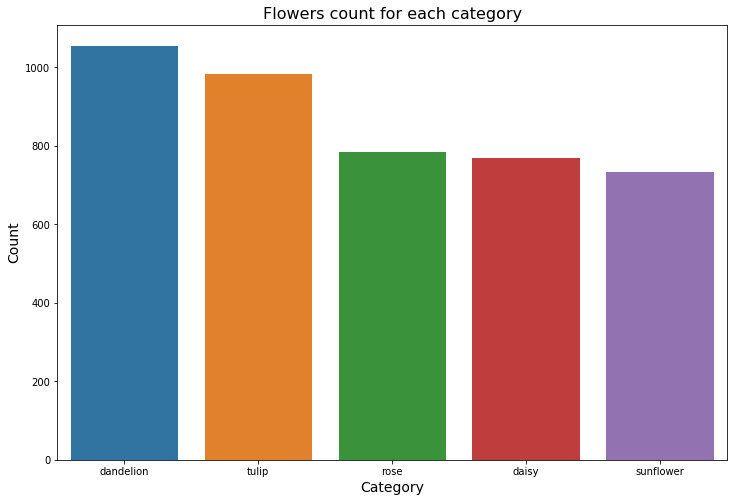

In [7]:
plt.figure(figsize = (12,8))
sns.barplot(flowers_count.index ,flowers_count.values )
plt.title("Flowers count for each category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

###  Creating neccessary Directories

In [8]:
# Make a parent directory `data` and two sub directories `train` and `valid`
%mkdir data\train
%mkdir data\valid

# Inside the train and validation sub=directories, make sub-directories for each catgeory
%cd data
os.path.abspath("")

%mkdir train\daisy
%mkdir train\tulip
%mkdir train\sunflower
%mkdir train\rose
%mkdir train\dandelion

%mkdir valid\daisy
%mkdir valid\tulip
%mkdir valid\sunflower
%mkdir valid\rose
%mkdir valid\dandelion


C:\Users\hp\Desktop\ML\My_Model\flowers_recognition\data


### Split the photos of each category in there corresponding Valid and train directories

In [9]:
#For each category, copy samples to the train and validation directory which we defined in the above step.
#The number of samples you want in your training and validation set is upto you.
for category in flowers_count.index:
    samples = flowers['image'][flowers['category'] == category].values
    perm = np.random.permutation(samples)
    # Copy first 30 samples to the validation directory and rest to the train directory
    for i in range(30):
        name = perm[i].split('/')[-1]
        shutil.copyfile(perm[i],'C:/Users/hp/Desktop/ML/My_Model/flowers_recognition/data/valid/' + str(category) + '/' + name)
    for i in range(31,len(perm)):
        name = perm[i].split('/')[-1]
        shutil.copyfile(perm[i],'C:/Users/hp/Desktop/ML/My_Model/flowers_recognition/data/train/' + str(category) + '/' + name)

## Create CNN

In [8]:

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (150, 150, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 500, activation = 'relu'))
classifier.add(Dense(units = 5, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

 

### Generate Train and Validation Generator for Images of Each Category

In [9]:
# Define the generators

batch_size = 8
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('C:/Users/hp/Desktop/ML/My_Model/flowers_recognition/data/train/',  
                                                    # this is the target directory
                                                    target_size=(150, 150),  # all images will be resized to 150x150
                                                    batch_size=batch_size,
                                                    class_mode='categorical')  # more than two classes

validation_generator = valid_datagen.flow_from_directory('C:/Users/hp/Desktop/ML/My_Model/flowers_recognition/data/valid/',
                                                        target_size=(150,150),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

Found 4168 images belonging to 5 classes.
Found 150 images belonging to 5 classes.


### Fit the Classifier

In [12]:
# Fit the Classifier
classifier.fit_generator(train_generator,
                         steps_per_epoch = 4168,
                         epochs = 10,
                         validation_data = validation_generator,
                         validation_steps = 150)



Epoch 1/10
4168/4168 [==============================] - 1190s 286ms/step - loss: 0.2711 - acc: 0.8862 - val_loss: 0.3472 - val_acc: 0.8545
Epoch 2/10
4168/4168 [==============================] - 1480s 355ms/step - loss: 0.1311 - acc: 0.9501 - val_loss: 0.5000 - val_acc: 0.8828
Epoch 3/10
4168/4168 [==============================] - 1486s 357ms/step - loss: 0.0719 - acc: 0.9744 - val_loss: 0.5928 - val_acc: 0.8793
Epoch 4/10
4168/4168 [==============================] - 1152s 276ms/step - loss: 0.0442 - acc: 0.9853 - val_loss: 0.6545 - val_acc: 0.8715
Epoch 5/10
4168/4168 [==============================] - 1115s 267ms/step - loss: 0.0336 - acc: 0.9891 - val_loss: 0.6091 - val_acc: 0.8863
Epoch 6/10
4168/4168 [==============================] - 1123s 269ms/step - loss: 0.0297 - acc: 0.9909 - val_loss: 0.7048 - val_acc: 0.8909
Epoch 7/10
4168/4168 [==============================] - 1118s 268ms/step - loss: 0.0244 - acc: 0.9927 - val_loss: 0.7659 - val_acc: 0.8843
Epoch 8/10
4168/4168 [=====

#### Import Library for Saving model in JSON

In [10]:
from keras.models import model_from_json

#### Converting Model into JSON and saving Weights of Model in .h5 format and saving into Disk

In [40]:
# serialize model to JSON
model_json = classifier.to_json()
with open("flower_recognition.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
classifier.save_weights("flower_recognition_classifier_weight.h5")
print("Saved model to disk")

Saved model to disk


## Predicting the given Image Category on Model

In [12]:
classifier.load_weights("flower_recognition_classifier_weight.h5")

In [13]:
from keras.preprocessing import image
test_image = image.load_img(r"C:\\Users\\hp\\Desktop\\ML\\My_Model\\flowers_recognition\\data\\sunflower.jpg", 
                            target_size = (150,150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = classifier.predict(test_image)
print(train_generator.class_indices)
if result[0][0] == 1:
    prediction = 'Daisy'
else:
    if result[0][1] ==1:
        prediction = 'Dendelion'
    else:
        if result[0][2] ==1:
            prediction = 'Rose'
        else:
            if result[0][3] ==1:
                prediction = 'Sunflower'
            else:
                if result[0][4] ==1:
                    prediction = 'Tulip'

print(prediction)
print(result)

{'dandelion': 1, 'daisy': 0, 'tulip': 4, 'rose': 2, 'sunflower': 3}
Sunflower
[[0. 0. 0. 1. 0.]]


In [14]:

# load json and create model
json_file = open('flower_recognition.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# load weights into new model
loaded_model.load_weights("flower_recognition_classifier_weight.h5")
print("Loaded model from disk")
 


Loaded model from disk


In [15]:
from keras.preprocessing import image

test_image = image.load_img(r"C:\\Users\\hp\\Desktop\\ML\\My_Model\\flowers_recognition\\data\\sunflower.jpg", 
                            target_size = (150,150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = loaded_model.predict(test_image)
print(train_generator.class_indices)
if result[0][0] == 1:
    prediction = 'daisy'
else:
    if result[0][1] ==1:
        prediction = 'dendelion'
    else:
        if result[0][2] ==1:
            prediction = 'rose'
        else:
            if result[0][3] ==1:
                prediction = 'sunflower'
            else:
                if result[0][4] ==1:
                    prediction = 'tulip'
    
print(prediction)
print(result)

{'dandelion': 1, 'daisy': 0, 'tulip': 4, 'rose': 2, 'sunflower': 3}
sunflower
[[0. 0. 0. 1. 0.]]
